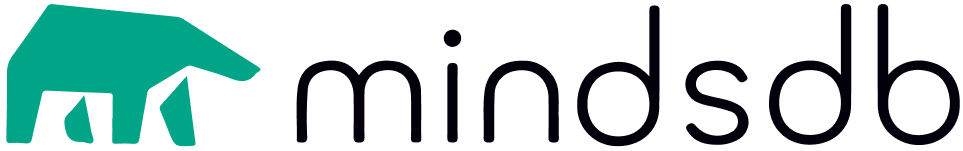

[MindsDB](https://github.com/mindsdb/mindsdb) is the platform for customizing AI from enterprise data. With MindsDB and its nearly 200 integrations to data sources and AI/ML frameworks, any developer can deploy, serve, and fine-tune models in real-time, and build AI-powered applications.

MindsDB integrates with Anyscale, enabling users to deploy, serve, and fine-tune Anyscale models within MindsDB, making them accessible to numerous data sources.

## Prerequisites

Before proceeding, ensure the following prerequisites are met:

- Install MindsDB locally via [Docker.](https://docs.mindsdb.com/setup/self-hosted/docker)
- To use Anyscale Endpoints within MindsDB, install the required dependencies following [this instruction.](https://docs.mindsdb.com/setup/self-hosted/docker#install-dependencies)
- Obtain the Anyscale Endpoints API key required to deploy and use Anyscale Endpoints models within MindsDB. Follow the [instructions for obtaining the API key.](https://docs.endpoints.anyscale.com/guides/authenticate/)

## Setup

Create an AI engine from the [Anyscale Endpoints handler](https://github.com/mindsdb/mindsdb/tree/staging/mindsdb/integrations/handlers/anyscale_endpoints_handler).

In [ ]:
CREATE ML_ENGINE anyscale_endpoints_engine
FROM anyscale_endpoints
USING
      anyscale_endpoints_api_key = 'api-key-value';

Create a model using `anyscale_endpoints_engine` as an engine.

In [ ]:
CREATE MODEL anyscale_endpoints_model
[FROM integration
         (SELECT * FROM table)]
PREDICT target_column
USING
      engine = 'anyscale_endpoints_engine',   -- engine name as created via CREATE ML_ENGINE
      model_name = 'model-name',              -- choose one of available models
      prompt_teplate = 'prompt-to-the-model'; -- prompt message to be completed by the model

## Usage

The following usage examples utilize `anyscale_endpoints_engine` to create a model with the `CREATE MODEL` statement.

Classify text sentiment using the Mistral 7B model.

In [ ]:
CREATE MODEL anyscale_endpoints_model
PREDICT sentiment
USING
   engine = 'anyscale_endpoints_engine',
   model_name = 'mistralai/Mistral-7B-Instruct-v0.1',
   prompt_template = 'Classify the sentiment of the following text as one of `positive`, `neutral` or `negative`: {{text}}';

Query the model to get predictions.

In [ ]:
SELECT text, sentiment
FROM anyscale_endpoints_model
WHERE text = 'I love machine learning!';

```sql
+--------------------------+-----------+
| text                     | sentiment |
+--------------------------+-----------+
| I love machine learning! | positive  |
+--------------------------+-----------+
```

<Tip>

**Next Steps**

For more information visit this [documentation](https://docs.mindsdb.com/integrations/ai-engines/anyscale).Follow [this tutorial](https://docs.mindsdb.com/use-cases/automated_finetuning/anyscale) to see more use case examples.
</Tip>